<a href="https://colab.research.google.com/github/jeongeun/ML/blob/tutorial/01_pytorch_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import time

import numpy as np

import matplotlib 
from matplotlib import pyplot as plt

import torch
print("INFO: pytorch version:", torch.__version__)

INFO: pytorch version: 1.12.1+cu113


# Declaring data array in PyTorch

In ```pytorch```, Tensors are the objects saving data.

pytorch: 모든 오브젝트를 tensor로 모두 저장.
integer, float 타입으로 저장.

In [2]:
# declaring tensor of integers numbers
tensor_int = torch.tensor([1,2,3])
print("tensor_created", tensor_int)
print("type :", type(tensor_int))
print("shape:", tensor_int.shape)
print("dtype:", tensor_int.dtype)
print("device:", tensor_int.device)
print("---------------------------------------------")
# declaring tensor of floating numbers
tensor_float = torch.tensor([1.,2.,3.])
print("tensor_created", tensor_float)
print("type :", type(tensor_float))
print("shape:", tensor_int.shape)
print("dtype:", tensor_float.dtype)
print("device:", tensor_int.device)
print("---------------------------------------------")

tensor_created tensor([1, 2, 3])
type : <class 'torch.Tensor'>
shape: torch.Size([3])
dtype: torch.int64
device: cpu
---------------------------------------------
tensor_created tensor([1., 2., 3.])
type : <class 'torch.Tensor'>
shape: torch.Size([3])
dtype: torch.float32
device: cpu
---------------------------------------------


You can also convert numpy arrays to tensors.

**Be careful that the default type for floating numbers are different**
* pytorch: float32
* numpy  : float64

In [3]:
arr_int = np.array([[1],[2],[3]])
print("ndarray_created", arr_int)
print("type :", type(arr_int))
print("shape:", arr_int.shape)
print("dtype:", arr_int.dtype)
print("---------------------------------------------")
arr_float = np.array([[1.],[2.],[3.]])
print("ndarray_created", arr_float)
print("type :", type(arr_float))
print("shape:", arr_float.shape)
print("dtype:", arr_float.dtype)
print("---------------------------------------------")

ndarray_created [[1]
 [2]
 [3]]
type : <class 'numpy.ndarray'>
shape: (3, 1)
dtype: int64
---------------------------------------------
ndarray_created [[1.]
 [2.]
 [3.]]
type : <class 'numpy.ndarray'>
shape: (3, 1)
dtype: float64
---------------------------------------------


위의 arr_float 를 tensor로 converting한다. 
**type을 지정할 때 중요**하다. 

**!주의 : gpu에 float64아니고 float32로 설정되어있다.**

In [4]:
tensor_float = torch.tensor(arr_float) # copy construct
print("tensor_created", tensor_float)
print("type :", type(tensor_float))
print("shape:", tensor_int.shape)
print("dtype:", tensor_float.dtype, "<- torch inherits types of input data")
print("device:", tensor_int.device)
print("---------------------------------------------")

tensor_created tensor([[1.],
        [2.],
        [3.]], dtype=torch.float64)
type : <class 'torch.Tensor'>
shape: torch.Size([3])
dtype: torch.float64 <- torch inherits types of input data
device: cpu
---------------------------------------------


This default type difference sometimes cause type error when you evaulate a neural network.
Let us consider a following **multilayer perceptron (MLP) with two hidden layers and ReLU activations.**

##
Sequential모델을 이용. 

4개의 linear layer, activate function ReLu \\
Linear 숫자 (n, m) : \\
n = dimesion of input, 한개의 input 넣고 \\
m = converted to dimension of output, 16개의 output 생성 
2 hidden layer 넣기.
\\

numpy 는 cpu only (gpu off). 

다른 모델 import할때 gpu on 해야 함.


In [5]:
model_mlp = torch.nn.Sequential(
    torch.nn.Linear(1, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 1),
)

In [6]:
# this code will throw RuntimeError
# please check your input types if this error pops up.
model_mlp(tensor_float)

RuntimeError: ignored

In [7]:
# this code will run without any problem.
model_mlp(tensor_float.type(torch.float32))

tensor([[-0.0544],
        [-0.0542],
        [-0.0683]], grad_fn=<AddmmBackward0>)

You can also "Load external DATA" and convert it to pytorch tensors for the data analysis.

The following file contains **10000 random samples of the standard 2D gaussian.**

In [8]:
# download file...
if not os.path.exists('data.std_normal_2d.npy'):
    !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19R7xHGTbWv9RoMW9dUtVDGVuzmTgF-Lt' -O data.std_normal_2d.npy

--2022-10-06 13:36:51--  https://docs.google.com/uc?export=download&id=19R7xHGTbWv9RoMW9dUtVDGVuzmTgF-Lt
Resolving docs.google.com (docs.google.com)... 142.251.161.102, 142.251.161.100, 142.251.161.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.161.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d009q0kg08d74m0fkqic43ajvis48d3q/1665063375000/10702479488373320068/*/19R7xHGTbWv9RoMW9dUtVDGVuzmTgF-Lt?e=download&uuid=7db2d4b4-28ae-4fca-8871-ce48bfa1cad0 [following]
--2022-10-06 13:36:51--  https://doc-00-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d009q0kg08d74m0fkqic43ajvis48d3q/1665063375000/10702479488373320068/*/19R7xHGTbWv9RoMW9dUtVDGVuzmTgF-Lt?e=download&uuid=7db2d4b4-28ae-4fca-8871-ce48bfa1cad0
Resolving doc-00-bs-docs.googleusercontent.com (doc-00-bs-docs.googleusercontent.com)... 74.125.129.132, 2607:f

tensor_created tensor([[ 0.0410, -0.5499],
        [ 0.0914,  0.3845],
        [-1.4588,  0.7957],
        ...,
        [ 0.1726,  1.0739],
        [ 0.2596,  2.1876],
        [-0.0886,  0.2547]])
type : <class 'torch.Tensor'>
shape: torch.Size([10000, 2])
dtype: torch.float32
device: cpu
---------------------------------------------


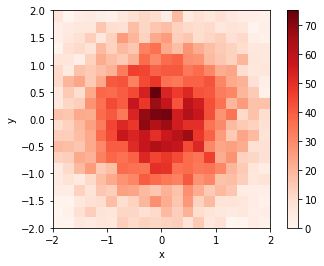

In [13]:
# load external dataset
arr_loaded    = np.load("data.std_normal_2d.npy").astype(np.float32)
tensor_loaded = torch.tensor(arr_loaded.astype(np.float32))
print("tensor_created", tensor_loaded)
print("type :", type(tensor_loaded))
print("shape:", tensor_loaded.shape)
print("dtype:", tensor_loaded.dtype)
print("device:", tensor_loaded.device)
print("---------------------------------------------")

# visualize the dataset
arr_buffer = tensor_loaded.numpy()
plt.hist2d(
    arr_buffer[:,0],
    arr_buffer[:,1],
    bins=[20,20],
    range=[[-2,2],[-2,2]],
    #cmap="Greys"
    cmap="Reds"
)
plt.colorbar()
plt.gca().set_aspect(1)
plt.gca().set_xlabel("x")
plt.gca().set_ylabel("y");

# Basic algebras in PyTorch

(1) pytorch supports the same algebraic operations available in NumPy.

In [14]:
# tensor with zeros
x = torch.zeros(size=(3,),dtype=torch.float32)
print(x)
print("---------------------------------")

# tensor with ones
y = torch.ones(size=(3,),dtype=torch.float32)
print(y)
print("---------------------------------")

# elementary operations
# 2*x + 3*y
print(2*x + 3*y)
print("---------------------------------")
# (2*y)^3
print((2*y)**3)
print("---------------------------------")

tensor([0., 0., 0.])
---------------------------------
tensor([1., 1., 1.])
---------------------------------
tensor([3., 3., 3.])
---------------------------------
tensor([8., 8., 8.])
---------------------------------


(2) pytorch also has many built-in math functions.

In [17]:
x = torch.ones(size=(3,),dtype=torch.float32)
print("x      =", x)
print("log(x) =", torch.log(x))
print("exp(x) =", torch.exp(x))
print("sin(x) =", torch.sin(x))

x      = tensor([1., 1., 1.])
log(x) = tensor([0., 0., 0.])
exp(x) = tensor([2.7183, 2.7183, 2.7183])
sin(x) = tensor([0.8415, 0.8415, 0.8415])


(3) pytorch tensors also follows the broadcasting rules for numpy arrays:

In [18]:
# broadcastings....
y = torch.ones(size=(4,3),dtype=torch.float32)
print(y)
print("---------------------------------")

# 1 + y
#   broadcasting (,) + (4,3) -> (4,3)
print(1. + y)
print("---------------------------------")

# [1,2,3] + y
#   broadcasting (3,) + (4,3) -> (4,3)
print(torch.linspace(1.,3.,3) + y)
print("---------------------------------")

# [[1],[2],[3],[4]] + y
#   broadcasting (4,1) + (4,3) -> (4,3)
print(torch.linspace(1.,4.,4)[:,None] + y)
print("---------------------------------")

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
---------------------------------
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
---------------------------------
tensor([[2., 3., 4.],
        [2., 3., 4.],
        [2., 3., 4.],
        [2., 3., 4.]])
---------------------------------
tensor([[2., 2., 2.],
        [3., 3., 3.],
        [4., 4., 4.],
        [5., 5., 5.]])
---------------------------------


# Calculating Derivatives

There are two ways of calculating derivatives:
- call backward function of given tensor : https://pytorch.org/docs/stable/generated/torch.autograd.backward.html#torch.autograd.backward
- torch.autograd.grad() : https://pytorch.org/docs/stable/generated/torch.autograd.grad.html

A quick summary of difference between those two can be found in: 
- https://pytorch.org/docs/stable/autograd.html
- https://stackoverflow.com/questions/69148622/difference-between-autograd-grad-and-autograd-backward

## Tensor.backward():
This method calculates gradients of given tensor with respect to all the graph leafs (the input tensors with requires_grad=True) and **accumulate** the gradient at tensor.grad field. 

This function is convenient for calculating derivatives during the network training.

In [29]:
# calculating derivative of x^2
x = torch.tensor(-1., requires_grad=True)
print("x     =", x)
y=x**2
print("y     =", y)
y.backward()
print("dy/dx =", x.grad)

x     = tensor(-1., requires_grad=True)
y     = tensor(1., grad_fn=<PowBackward0>)
dy/dx = tensor(-2.)


! Be careful that backward() function is **accumulating** the gradients to the ```tensor.grad```, not saving the gradients.

cf) I used ```retain_graph=True``` to keep the graph for backpropagation. Without this flag, the graph will be immediate released after computing gradinet, and you cannot backpropagate through the graph again. 

In [20]:
# calculating derivative of x^2
x = torch.tensor(-1., requires_grad=True)
print("x     =", x)
y=x**2
print("y     =", y)
y.backward(retain_graph=True)   # used retain_graph=True to keep the graph for backpropagation. Without this flag, the graph will be immediate released after computing gradinetand you cannot backpropagate   
print("dy/dx =", x.grad)
# calculating derivative of x^2?
y.backward(retain_graph=True)
print("dy/dx?=", x.grad, "<- this will not be -2, but (-2)+(-2)=-4")
# calculating derivative of x^2 after resetting the gradient
x.grad = None
y.backward()
print("dy/dx =", x.grad)

x     = tensor(-1., requires_grad=True)
y     = tensor(1., grad_fn=<PowBackward0>)
dy/dx = tensor(-2.)
dy/dx?= tensor(-4.) <- this will not be -2, but (-2)+(-2)=-4
dy/dx = tensor(-2.)


## torch.autograd.grad():

This function calculates gradient of given tensor with respect to the provided leaf tensor, i.e., ```torch.autograd.grad(y,x)``` will calculates dy/dx.
This function is useful when you need to explicitly compute some derivatives and higher order derivatives.

In [28]:
# calculating derivative of x^2
x = torch.tensor(-1., requires_grad=True)
print("x      =", x)
y=x**2
print("y      =", y)
dydx = torch.autograd.grad(y,x)[0] # this returns a tuple whose first componenet is the gradient.
print("dy/dx  =", dydx)
print("x.grad =", x.grad)


x      = tensor(-1., requires_grad=True)
y      = tensor(1., grad_fn=<PowBackward0>)
dy/dx  = tensor(-2.)
x.grad = None


Calculating higher order derivatives are also straightforward with ```torch.autograd.grad()```, but you have to set flag ```create_graph=True``` to make the grad function create graphs for backpropagation.

In [25]:
# calculating 2nd order derivative of x^4
x = torch.tensor(-1., requires_grad=True)
print("x      =", x)
y=x**4
print("y      =", y)
dy_dx = torch.autograd.grad(y, x, create_graph=True)[0] 
print("dy/dx  =", dy_dx, "<- you can see that grad_fn is also created")
ddy_dxdx = torch.autograd.grad(dy_dx, x)[0]
print("d^2y/dx^2  =", ddy_dxdx)


x      = tensor(-1., requires_grad=True)
y      = tensor(1., grad_fn=<PowBackward0>)
dy/dx  = tensor(-4., grad_fn=<MulBackward0>) <- you can see that grad_fn is also created
d^2y/dx^2  = tensor(12.)


# Gradient of non-scalar tensors

For calculating **gradients of non-scalar tensors**, we need **additional vector input** since the backpropagation algorithm or backward automatic differentition calculates the following vector-Jacobian product,
\begin{equation}
(x_i)\mathrm{.grad} =  v_i \frac{dy_i}{d x_j}
\end{equation}

In [27]:
# calculating derivative of x^2
x = torch.tensor([-1.,-2.], requires_grad=True)
print("x     =", x)
y=x**2
print("y     =", y)
y.backward()
print("dy/dx =", x.grad)

x     = tensor([-1., -2.], requires_grad=True)
y     = tensor([1., 4.], grad_fn=<PowBackward0>)


RuntimeError: ignored

For component-wise differentiation, you may simply feed vectors whose components are all 1.

In [ ]:
# calculating derivative of x^2
x = torch.tensor([-1.,-2.], requires_grad=True)
print("x     =", x)
y=x**2
print("y     =", y)
v = torch.ones_like(x)
print("v     =", seed)
y.backward(gradient=seed)  # gradient is the input v_i in the above equation.
print("dy/dx =", x.grad)

x     = tensor([-1., -2.], requires_grad=True)
y     = tensor([1., 4.], grad_fn=<PowBackward0>)
v     = tensor([1., 1.])
dy/dx = tensor([-2., -4.])


# Using GPUs for computing tensor operations

So far, we did all the calculation on CPU. 

In order to  use **GPU**, we have to declare tensors and models on GPU.

In [31]:
# scan available GPUs, 
if torch.cuda.is_available():
    print("GPU is available")
    print("# of GPUs: ", torch.cuda.device_count())
    print("listing available GPUs...")
    for i in range(torch.cuda.device_count()):
        print("device: cuda:{}".format(i))
        print("   GPU name: ",torch.cuda.get_device_name(i))
        print("   cuda capability: major:{}, minor:{}".format(*torch.cuda.get_device_capability(i)))
        
else:
    print("GPU is NOT available")

GPU is available
# of GPUs:  1
listing available GPUs...
device: cuda:0
   GPU name:  Tesla T4
   cuda capability: major:7, minor:5


We will use the first GPU ```cuda:0```. For convenience, we will save the device object to device variable.

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("INFO: device will be used:", device)

INFO: device will be used: cuda:0


To create a tensor on GPU, use device parameters when create a tensor.

In [33]:
# declaring tensor of integers numbers
tensor_int = torch.tensor([[1],[2],[3]], device=device)
print("tensor_created", tensor_int)
print("type :", type(tensor_int))
print("shape:", tensor_int.shape)
print("dtype:", tensor_int.dtype)
print("device:", tensor_int.device)
print("---------------------------------------------")
# declaring tensor of floating numbers
tensor_float = torch.tensor([[1.],[2.],[3.]], device=device)
print("tensor_created", tensor_float)
print("type :", type(tensor_float))
print("shape:", tensor_int.shape)
print("dtype:", tensor_float.dtype)
print("device:", tensor_int.device)
print("---------------------------------------------")

tensor_created tensor([[1],
        [2],
        [3]], device='cuda:0')
type : <class 'torch.Tensor'>
shape: torch.Size([3, 1])
dtype: torch.int64
device: cuda:0
---------------------------------------------
tensor_created tensor([[1.],
        [2.],
        [3.]], device='cuda:0')
type : <class 'torch.Tensor'>
shape: torch.Size([3, 1])
dtype: torch.float32
device: cuda:0
---------------------------------------------


In [35]:
# calculating derivative of x^2
x = torch.tensor(-1., requires_grad=True, device=device)
print("x     =", x)
y=x**2
print("y     =", y)
y.backward()
print("dy/dx =", x.grad)

x     = tensor(-1., device='cuda:0', requires_grad=True)
y     = tensor(1., device='cuda:0', grad_fn=<PowBackward0>)
dy/dx = tensor(-2., device='cuda:0')


You can also transfer tensors on CPU to GPU and vice versa.

In [39]:
# CPU -> GPU
tensor_float = torch.tensor([[1.],[2.],[3.]]).to(device)
print("tensor_created", tensor_float)
print("type :", type(tensor_float))
print("shape:", tensor_float.shape)
print("dtype:", tensor_float.dtype)
print("device:", tensor_float.device)
print("---------------------------------------------")
# GPU -> CPU
tensor_float = torch.tensor([[1.],[2.],[3.]],device=device).cpu()
print("tensor_created", tensor_float)
print("type :", type(tensor_float))
print("shape:", tensor_float.shape)
print("dtype:", tensor_float.dtype)
print("device:", tensor_float.device)
print("---------------------------------------------")

tensor_created tensor([[1.],
        [2.],
        [3.]], device='cuda:0')
type : <class 'torch.Tensor'>
shape: torch.Size([3, 1])
dtype: torch.float32
device: cuda:0
---------------------------------------------
tensor_created tensor([[1.],
        [2.],
        [3.]])
type : <class 'torch.Tensor'>
shape: torch.Size([3, 1])
dtype: torch.float32
device: cpu
---------------------------------------------


Neural network model can be transferred, too.

In [40]:
model_mlp = torch.nn.Sequential(
    torch.nn.Linear(1, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 1),
).to(device)

tensor_float = torch.tensor([[1.],[2.],[3.]], device=device)
model_mlp(tensor_float)

tensor([[0.2691],
        [0.2837],
        [0.3218]], device='cuda:0', grad_fn=<AddmmBackward0>)

Be careful that we cannot calculate algebraic operations on the tensors in different devices. 

In [41]:
tensor_float = torch.tensor([[1.],[2.],[3.]]) # this tensor is on CPU!
model_mlp(tensor_float)

RuntimeError: ignored

If you want to bring tensors on GPU on cpu and convert it to numpy array, here is a code snippet:

In [42]:
tensor_float = torch.tensor([[1.],[2.],[3.]], device=device)
arr_float = tensor_float.cpu().numpy() # <- this one
print("ndarray_created", arr_float)
print("type :", type(arr_float))
print("shape:", arr_float.shape)
print("dtype:", arr_float.dtype)
print("---------------------------------------------")

ndarray_created [[1.]
 [2.]
 [3.]]
type : <class 'numpy.ndarray'>
shape: (3, 1)
dtype: float32
---------------------------------------------


But if the tensor requires grad, we have to detach it from the graph first before the conversion.

In [43]:
tensor_float = torch.tensor([[1.],[2.],[3.]], device=device, requires_grad=True)
arr_float = tensor_float.detach().cpu().numpy() # <- try it without detach()
print("ndarray_created", arr_float)
print("type :", type(arr_float))
print("shape:", arr_float.shape)
print("dtype:", arr_float.dtype)
print("---------------------------------------------")

ndarray_created [[1.]
 [2.]
 [3.]]
type : <class 'numpy.ndarray'>
shape: (3, 1)
dtype: float32
---------------------------------------------
